# HW3 MAC De-Randomization

### Importing Necessary Packages

In [1]:
import pandas as pd # To read the data and process it
import os # To read the files in the directory
from sklearn.preprocessing import LabelEncoder # To encode the labels
import matplotlib.pyplot as plt # For heatmap
import seaborn as sns # For heatmap
from sklearn.metrics import homogeneity_completeness_v_measure # To calculate the metrics
import numpy as np # To generate random indices for the second part of the assignment


### Reading The Data & Creating a Data Frame

In [2]:
# Directory path
directory = 'lecture-dataset'

# Getting the list of CSV files in the directory
csv_files = [file for file in os.listdir(directory) if file.endswith('.csv')]

# Creating an empty dataframe
df = pd.DataFrame()

# Reading each CSV file and append it to the dataframe
for file in csv_files:
    file_path = os.path.join(directory, file)
    df_temp = pd.read_csv(file_path)
    df = pd.concat([df, df_temp], ignore_index=True)


### Pre-Processing and Examining Data

The data consist of 4988 probe requests and 14 columns. Further investigation is done in the next cells.

In [3]:
display(df)

,Timestamp,MAC Address,Channel,DS Channel,HT Capabilities,Extended Capabilities,Vendor Specific Tags,SSID,Supported Rates,Extended Supported Rates,VHT Capabilities,HE Capabilities,Length,Label
0,1.684589e+09,76:f7:2b:0e:35:f3,1,1.0,2d001bffff000000000000000000000000000000000000...,4.004880e+18,00904c0408bf0c7678910ffaff0000faff0020,NaN,82848b96,0c1218243048606c,NaN,020014,193,S21Ultra-M_a
1,1.684589e+09,76:f7:2b:0e:35:f3,1,1.0,2d001bffff000000000000000000000000000000000000...,4.004880e+18,00904c0408bf0c7678910ffaff0000faff0020,NaN,82848b96,0c1218243048606c,NaN,020014,193,S21Ultra-M_a
2,1.684589e+09,76:f7:2b:0e:35:f3,6,6.0,2d001bffff000000000000000000000000000000000000...,4.004880e+18,00904c0408bf0c7678910ffaff0000faff0020,NaN,82848b96,0c1218243048606c,NaN,020014,193,S21Ultra-M_a
3,1.684589e+09,76:f7:2b:0e:35:f3,6,6.0,2d001bffff000000000000000000000000000000000000...,4.004880e+18,00904c0408bf0c7678910ffaff0000faff0020,NaN,82848b96,0c1218243048606c,NaN,020014,193,S21Ultra-M_a
4,1.684589e+09,76:f7:2b:0e:35:f3,11,11.0,2d001bffff000000000000000000000000000000000000...,4.004880e+18,00904c0408bf0c7678910ffaff0000faff0020,NaN,82848b96,0c1218243048606c,NaN,020014,193,S21Ultra-M_a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4983,1.622477e+09,22:45:43:e4:c8:fd,1,1.0,214017ff00000000000000000000000000000000000000...,4.000884e+14,0017f20a00010400000000,NaN,02040b16,0c1218243048606c,NaN,NaN,144,iPhone6_N
4984,1.622477e+09,22:45:43:e4:c8:fd,6,4.0,214017ff00000000000000000000000000000000000000...,4.000884e+14,0017f20a00010400000000,NaN,02040b16,0c1218243048606c,NaN,NaN,156,iPhone6_N
4985,1.622477e+09,22:45:43:e4:c8:fd,6,4.0,214017ff00000000000000000000000000000000000000...,4.000884e+14,0017f20a00010400000000,NaN,02040b16,0c1218243048606c,NaN,NaN,156,iPhone6_N
4986,1.622477e+09,22:45:43:e4:c8:fd,6,5.0,214017ff00000000000000000000000000000000000000...,4.000884e+14,0017f20a00010400000000,NaN,02040b16,0c1218243048606c,NaN,NaN,156,iPhone6_N


As a first step, we convert timestamps to datetime, in case a numerical operation is needed for timestamps

In [4]:
# Converting the timestamp to datetime
df['Timestamp']=pd.to_datetime(df['Timestamp'], unit='s')

In the next part, the dataframe is cleaned by removing columns that have more than 60% missing or NaN values.

In [5]:
nan_sum = df.isna().sum() # The number of NaN values in each column
nan_percentage = (nan_sum/len(df))*100 # The percentage of NaN values in each column

print(nan_percentage)

col_drop = [] # List of columns to be dropped

# Dropping the columns with more than 60% NaN values
for i in range(0,len(nan_percentage)):
  if nan_percentage.iloc[i] > 60:
    col_drop.append(nan_percentage.index[i])
  
clean_df = df.drop(col_drop, axis=1)
del df # Deleting the original dataframe to free up memory

print("Dropped columns are: ", col_drop)



Timestamp                     0.000000
MAC Address                   0.000000
Channel                       0.000000
DS Channel                    0.581395
HT Capabilities               0.020048
Extended Capabilities         0.020048
Vendor Specific Tags         18.905373
SSID                         91.439455
Supported Rates               0.000000
Extended Supported Rates      0.020048
VHT Capabilities            100.000000
HE Capabilities              81.295108
Length                        0.000000
Label                         0.000000
dtype: float64
Dropped columns are:  ['SSID', 'VHT Capabilities', 'HE Capabilities']


As it can be seen from the results of the cell in the upside, 'SSID', 'VHT Capabilities', 'HE Capabilities' columns has missing values higher than 60%. Therefore, dropping those columns will help to get better and more general results.

In the next cell the unique number of values in the columns are examined. If there are too much unique values, it is not a good feature to be clustered. If there are less than 20 unique values in a columns, the column name is saved as a feature for future usage

In [6]:
# Finding number of unique elements in each column
unique_elem = clean_df.nunique()

print(unique_elem)

features = []

# Selecting the columns with less than 20 unique elements
for i in range(0,len(unique_elem)-1):
  if unique_elem[i] < 20:
    features.append(unique_elem.index[i])

print(features)

Timestamp                   4988
MAC Address                  718
Channel                        3
DS Channel                    13
HT Capabilities                8
Extended Capabilities          7
Vendor Specific Tags           5
Supported Rates                4
Extended Supported Rates       2
Length                        16
Label                          7
dtype: int64
['Channel', 'DS Channel', 'HT Capabilities', 'Extended Capabilities', 'Vendor Specific Tags', 'Supported Rates', 'Extended Supported Rates', 'Length']


/var/folders/wf/h4cmwskx1rxch7ts3ytb_7cr0000gn/T/ipykernel_23591/2982976956.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if unique_elem[i] < 20:


Although there are too many unique MAC Addresses, they are very important during the clustering because same random MAC Addresses mean that they are from the same device since having same randomazed MAC Address is very low probability and if it happened, there will be also problems during the routing. Therefore, it should also handled in the routing part. 

In this case, in the MAC Addresses are used in the online clustering algorithm.

Encoder function is defined in the next cell. The purpose of this function is to encode categorical features in the DataFrame into numerical values, which allows to use these features in clustering.

An instance of LabelEncoder is created, and the fit_transform method is called on the feature data. This method fits the encoder to the data (i.e., determines the unique categories and assigns a numerical value to each) and then transforms the data into the numerical encoding. The transformed data is then used to replace the original feature data in the DataFrame copy.

After all the features have been processed, the function converts the data type of the features in the DataFrame copy to float. This is done using the astype method of the DataFrame, which converts the data type of the DataFrame or a series.

In [7]:
def encoder(df,features):
  df_tmp = df.copy() # To avoid modifying the original data
  for elem in features:
    if elem != 'Lenght' and elem != 'Channel' and elem != 'DS Channel': # Excluding the columns with already numerical values
      label_encoder = LabelEncoder() # An instance of the label encoder
      df_tmp[elem] = label_encoder.fit_transform(df_tmp[elem].astype(str)) # Encoding the column

  df_tmp[features]=df_tmp[features].astype(float) # Converting the columns to float
  return df_tmp


The encoder function is applied to pre-processed clean DataFrame. It can be observed that all the categorical values are converted into numerical values except labels and MAC Addresses

In [8]:
encoded_df = encoder(clean_df,features) # Encoding the dataframe
probes_df = encoded_df.drop(['Timestamp'],axis=1).copy() # Dropping the timestamp column
display(probes_df)

,MAC Address,Channel,DS Channel,HT Capabilities,Extended Capabilities,Vendor Specific Tags,Supported Rates,Extended Supported Rates,Length,Label
0,76:f7:2b:0e:35:f3,1.0,1.0,4.0,1.0,4.0,1.0,0.0,12.0,S21Ultra-M_a
1,76:f7:2b:0e:35:f3,1.0,1.0,4.0,1.0,4.0,1.0,0.0,12.0,S21Ultra-M_a
2,76:f7:2b:0e:35:f3,6.0,6.0,4.0,1.0,4.0,1.0,0.0,12.0,S21Ultra-M_a
3,76:f7:2b:0e:35:f3,6.0,6.0,4.0,1.0,4.0,1.0,0.0,12.0,S21Ultra-M_a
4,76:f7:2b:0e:35:f3,11.0,11.0,4.0,1.0,4.0,1.0,0.0,12.0,S21Ultra-M_a
...,...,...,...,...,...,...,...,...,...,...
4983,22:45:43:e4:c8:fd,1.0,1.0,2.0,2.0,1.0,0.0,0.0,7.0,iPhone6_N
4984,22:45:43:e4:c8:fd,6.0,4.0,2.0,2.0,1.0,0.0,0.0,9.0,iPhone6_N
4985,22:45:43:e4:c8:fd,6.0,4.0,2.0,2.0,1.0,0.0,0.0,9.0,iPhone6_N
4986,22:45:43:e4:c8:fd,6.0,5.0,2.0,2.0,1.0,0.0,0.0,9.0,iPhone6_N


### Online Clustering

The function for ploting heatmap is defined.

In [9]:
def plot_heatmap(df, column1, column2, colormap="Blues"):
   crosstab = pd.crosstab(df[column1], df[column2]) # Creating a crosstab

   sns.set_theme(style="whitegrid",font_scale=1) # Setting the theme
   plt.figure(figsize=(15,10)) # Setting the figure size

   sns.heatmap(crosstab,annot=True, fmt="d", cmap=colormap) # Creating the heatmap

   plt.title(f"Heatmap of {column1} vs {column2}") # Setting the title
   plt.xlabel(column2) # Setting the x-axis label
   plt.ylabel(column1) # Setting the y-axis label

   plt.show() # Displaying the plot

The usable columns are assigned to a variable. This is needed for only to prepare an input for online clustering function and also observing which columns will involve clustering. 

In [10]:
usable_features = features.copy()
display(usable_features)

['Channel',
 'DS Channel',
 'HT Capabilities',
 'Extended Capabilities',
 'Vendor Specific Tags',
 'Supported Rates',
 'Extended Supported Rates',
 'Length']

In the next cell, the online clustering function is defined. The function takes three parameters: df (the DataFrame to be clustered), N (the minimum number of matching features required to assign a row to an existing cluster), and usable_features (the list of features to be used for clustering).

The function begins by initializing an empty dictionary clusters to store clusters and their corresponding feature combinations. It then iterates through each row of the DataFrame. For each row, it first checks if the 'MAC Address' is not None. If the 'MAC Address' of the current row matches with any existing cluster's 'MAC Address', the row is assigned to that cluster and the process continues to the next row.

In this part, I assumed that the same MAC Address means that the same device because generating the same random MAC Address has very low probability and it can also cause problems in the routing. Therefore, when a MAC Address is matched, the probe is assigned to the same cluster.

If no match is found, the function then calculates the number of matching features with each existing cluster. If the number of matching features is greater than or equal to N and is more than the maximum number of matching features found so far, the cluster ID and the number of matching features are updated.

After checking all existing clusters, if a best matching cluster is found (i.e., best_cluster_id is not None), the current row is assigned to that cluster and the cluster's features are updated to include the current row's features. If no suitable cluster is found, a new cluster is created and the current row is assigned to this new cluster.

Finally, if the DataFrame has a 'Label' column, the function calculates the homogeneity, completeness, and V-Measure scores of the clustering result using the homogeneity_completeness_v_measure function. It also calculates the error as the difference between the number of unique cluster IDs and the number of unique labels. The function then returns the updated DataFrame, the homogeneity, completeness, V-Measure scores, and the error. 

For the unlabelled data, if there is no 'Label' column, the function simply returns the updated DataFrame.

The homogeneity_completeness_v_measure function is a metric used to evaluate the quality of the clustering. It calculates three scores: homogeneity (a measure of whether each cluster contains only members of a single class), completeness (a measure of whether all members of a given class are in the same cluster), and V-Measure (the harmonic mean of homogeneity and completeness). The function takes two parameters: labels_true (the ground truth class labels) and labels_pred (the predicted cluster labels). It returns the homogeneity, completeness, and V-Measure scores

In [11]:
# Clustering function
def cluster_rows(df, N, usable_features):
    # Dictionary to store clusters and their corresponding feature combinations
    clusters = {}

    # Iterate through each row of the DataFrame
    for index, row in df.iterrows():
        # Check if the MAC address is not None
        mac_address = row['MAC Address']
        for cluster_id, cluster_row in clusters.items():
            if mac_address in cluster_row['MAC Address']:
            # Assign the current row to the existing cluster with the matching MAC address
                df.loc[index, 'Cluster ID'] = cluster_id
                clusters[cluster_id] = row
                continue
                
        # Initialize variables to track best matching cluster
        best_cluster_id = None
        max_matching_features = 0
        # Calculate matching features with each existing cluster
        for cluster_id, cluster_row in clusters.items():
            num_matching_features = sum(row[feature] == cluster_row[feature] for feature in usable_features)

            # It also handles ties, because the first cluster with the same number of matching features will be selected
            if num_matching_features >= N and num_matching_features > max_matching_features:
                best_cluster_id = cluster_id
                max_matching_features = num_matching_features

        # Assign the current row to an existing or new cluster
        if best_cluster_id is not None:
            # Assign to existing cluster with sufficient matching features
            df.loc[index, 'Cluster ID'] = best_cluster_id
            # Update the cluster row to include the current row's features (for potential future matches)
            clusters[best_cluster_id] = row
        else:
            # Create a new cluster with a new cluster ID
            new_cluster_id = len(clusters)
            clusters[new_cluster_id] = row
            df.loc[index, 'Cluster ID'] = new_cluster_id
    
    if 'Label' in df.columns:
        h, c, v = homogeneity_completeness_v_measure(df["Label"], df["Cluster ID"])
        n_unique_clusterid = df["Cluster ID"].nunique()
        n_unique_label = df["Label"].nunique()
        error = n_unique_clusterid - n_unique_label
        return df, h, c, v, error
    else:        
        return df 

Performance metrics are calculated and displayed for all possible N values (up to number of usable features) in the next cell.

In [12]:
# Calculate V-measure score for different values of N
results = []

for N in range(1, len(usable_features)+1):
    df_clustered = probes_df.copy()
    _, h, c, v, error = cluster_rows(df_clustered, N, usable_features)
    results.append({'N': N, 'V-measure': v, 'Homogeneity': h, 'Completeness': c,  'Error': error})

# Display results
results_df = pd.DataFrame(results)
print(results_df)

   N  V-measure  Homogeneity  Completeness  Error
0  1   0.014501     0.007421      0.316012     -5
1  2   0.622090     0.458726      0.966170     -4
2  3   0.695597     0.541834      0.971210     -3
3  4   0.956016     0.931710      0.981624      0
4  5   0.949646     0.931710      0.968285      1
5  6   0.708275     0.959259      0.561391     38
6  7   0.490452     0.954897      0.329964    187
7  8   0.461077     1.000000      0.299610    272


As it can be seen from the results of performance metrics, N=4 looks like it performs best. When N is very low, the probe requests are clustered into a few clusters, which does not differ the devices. When N is very high, it clusters almost every probe request into different cluster, which treats as if every probes request are coming from a new device.

 When the heatmap in the next cell, iPhoneXR-U, Huawei and iPhone6_N are complete and homogenous in cluster 2, 5 and 6 respectively. The biggest confusion happens for iPhone11 and iPhone12. The reason is probably the similarity between two devices. iPhone 12 is just new model of iPhone 11, probably they did not change so much features for probe request. Therefore, it is very hard (maybe impossible) to distinguish them while clustering. Cluster 4 is also a case where the number of matching is too high. SamsungJ6 can generate probe request that can differ more than features. Cluster 4 could be a case where the mode of the devices is changed, for example, the supported rates or other features can change in low battery mode. 
 
 When the cluster 3 and cluster 4 are examined in the cell after the heatmap, all the probe requests in cluster 3 from SamsungJ6 has DS Channel feature, while non of the probe request in cluster 4 from SamsungJ6 has a DS Channel. Also the NaN percentage of the DS Channel is 58%. Therefore, lowering the threshold for NaN percentage from 60 to 55 and excluding DS Channel can increase performance


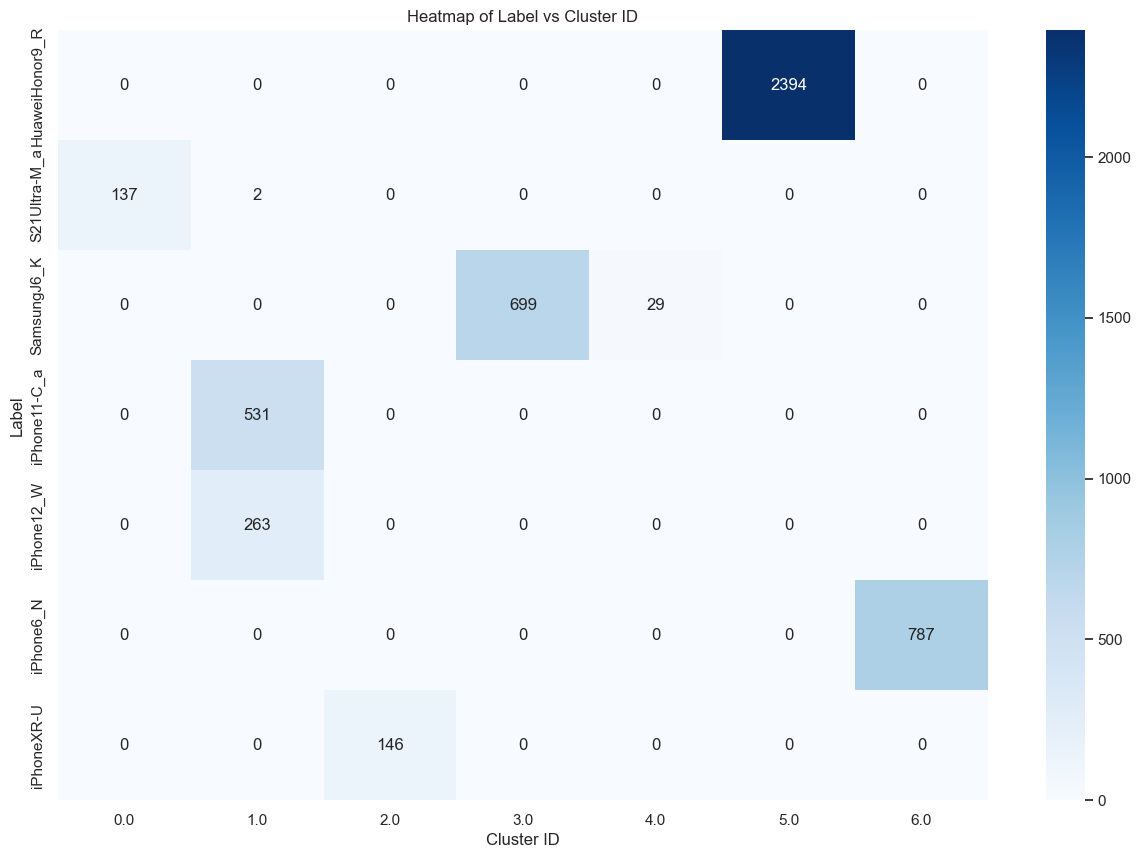

In [14]:
df_to_cluster = probes_df.copy()
best_df, _, _, _, _ = cluster_rows(df_to_cluster, 4, usable_features) # Clustering the rows with N=4, which is the best
plot_heatmap(best_df, "Label", "Cluster ID")


In [22]:

display(best_df[best_df['Cluster ID'] == 3])
display(best_df[best_df['Cluster ID'] == 4])
display(best_df[best_df['Cluster ID'] == 3]['DS Channel'].value_counts())


,MAC Address,Channel,DS Channel,HT Capabilities,Extended Capabilities,Vendor Specific Tags,Supported Rates,Extended Supported Rates,Length,Label,Cluster ID
816,7a:e3:17:f9:50:df,1.0,1.0,1.0,4.0,0.0,0.0,0.0,3.0,SamsungJ6_K,3.0
817,7a:e3:17:f9:50:df,11.0,1.0,1.0,4.0,0.0,0.0,0.0,3.0,SamsungJ6_K,3.0
818,7a:e3:17:f9:50:df,11.0,1.0,1.0,4.0,0.0,0.0,0.0,3.0,SamsungJ6_K,3.0
819,7a:e3:17:f9:50:df,1.0,1.0,1.0,4.0,0.0,0.0,0.0,3.0,SamsungJ6_K,3.0
820,7a:e3:17:f9:50:df,11.0,2.0,1.0,4.0,0.0,0.0,0.0,3.0,SamsungJ6_K,3.0
...,...,...,...,...,...,...,...,...,...,...,...
1524,5a:a1:51:c2:71:6f,11.0,11.0,1.0,4.0,0.0,0.0,0.0,3.0,SamsungJ6_K,3.0
1525,5a:a1:51:c2:71:6f,11.0,11.0,1.0,4.0,0.0,0.0,0.0,3.0,SamsungJ6_K,3.0
1526,5a:a1:51:c2:71:6f,11.0,12.0,1.0,4.0,0.0,0.0,0.0,3.0,SamsungJ6_K,3.0
1527,5a:a1:51:c2:71:6f,11.0,12.0,1.0,4.0,0.0,0.0,0.0,3.0,SamsungJ6_K,3.0


,MAC Address,Channel,DS Channel,HT Capabilities,Extended Capabilities,Vendor Specific Tags,Supported Rates,Extended Supported Rates,Length,Label,Cluster ID
1155,00:0f:00:6a:68:8b,1.0,NaN,8.0,7.0,5.0,3.0,2.0,15.0,SamsungJ6_K,4.0
1156,00:0f:00:6a:68:8b,1.0,NaN,7.0,0.0,2.0,2.0,1.0,14.0,SamsungJ6_K,4.0
1157,00:0f:00:6a:68:8b,1.0,NaN,7.0,0.0,2.0,2.0,1.0,14.0,SamsungJ6_K,4.0
1158,00:0f:00:6a:68:8b,1.0,NaN,7.0,0.0,2.0,2.0,1.0,14.0,SamsungJ6_K,4.0
1159,00:0f:00:6a:68:8b,1.0,NaN,7.0,0.0,2.0,2.0,1.0,14.0,SamsungJ6_K,4.0
1160,00:0f:00:6a:68:8b,1.0,NaN,7.0,0.0,2.0,2.0,1.0,14.0,SamsungJ6_K,4.0
1161,00:0f:00:6a:68:8b,6.0,NaN,7.0,0.0,2.0,2.0,1.0,13.0,SamsungJ6_K,4.0
1162,00:0f:00:6a:68:8b,11.0,NaN,7.0,0.0,2.0,2.0,1.0,14.0,SamsungJ6_K,4.0
1163,00:0f:00:6a:68:8b,11.0,NaN,7.0,0.0,2.0,2.0,1.0,14.0,SamsungJ6_K,4.0
1164,00:0f:00:6a:68:8b,11.0,NaN,7.0,0.0,2.0,2.0,1.0,14.0,SamsungJ6_K,4.0


DS Channel
2.0     96
3.0     96
9.0     68
6.0     66
1.0     58
10.0    56
11.0    51
13.0    49
12.0    44
4.0     37
7.0     27
8.0     27
5.0     24
Name: count, dtype: int64

Let's drop the DS Channel and cluster again

In [24]:
usable_features = features.copy()
usable_features.remove('DS Channel')
print(usable_features)

['Channel', 'HT Capabilities', 'Extended Capabilities', 'Vendor Specific Tags', 'Supported Rates', 'Extended Supported Rates', 'Length']


The same cell used to calculate performance metrics

In [25]:
# Calculate V-measure score for different values of N
results = []

for N in range(1, len(usable_features)+1):
    df_clustered = probes_df.copy()
    _, h, c, v, error = cluster_rows(df_clustered, N, usable_features)
    results.append({'N': N, 'V-measure': v, 'Homogeneity': h, 'Completeness': c,  'Error': error})

# Display results
results_df = pd.DataFrame(results)
print(results_df)

   N  V-measure  Homogeneity  Completeness  Error
0  1   0.014501     0.007421      0.316012     -5
1  2   0.246647     0.142931      0.898977     -4
2  3   0.896483     0.825435      0.980913     -2
3  4   0.956016     0.931710      0.981624      0
4  5   0.949646     0.931710      0.968285      1
5  6   0.754432     0.961044      0.620938     39
6  7   0.626178     1.000000      0.455793    188


No change is observed for the small N values, since other columns are enough to cluster without need of matching DS Channel however, it increased the performance of the clusters with high N values.

The clustering is the same for N=4

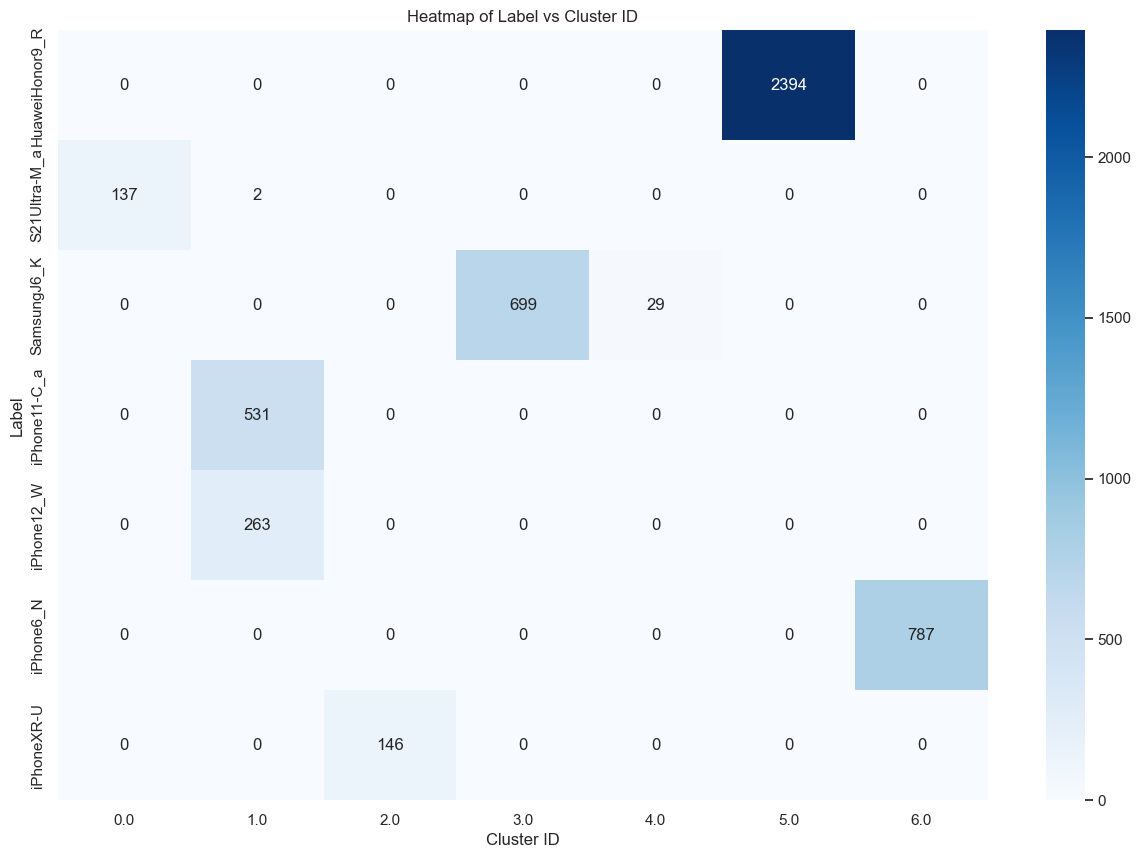

In [26]:
df_to_cluster = probes_df.copy()
best_df, _, _, _, _ = cluster_rows(df_to_cluster, 4, usable_features) # Clustering the rows with N=4, which is the best
plot_heatmap(best_df, "Label", "Cluster ID")


### Validating The Approach With a New Dataset

All the CSV files are read and saved into challenge_dfs. challenge_dfs is consist of 6 dataframes from the csv files.

In [27]:
# Read csv files from challenge-dataset, and assign each of them to a different dataframe 
directory = 'challenge-dataset'
csv_files = [file for file in os.listdir(directory) if file.endswith('.csv')]
challenge_dfs = [pd.read_csv(os.path.join(directory, file)) for file in csv_files]

The next function gets an empty DataFrame dictionary, challenge_dfs, and K, the number of the size of the test set.
Each Dataframe dictionary consist of 5 DataFrames as test sets except the dictionary for K = 6

The function creates each test sets by first generating random indices which correspond to randomly selected devices. Then it gets DataFrames from the challenge_dfs

In [28]:
# Creating test sets
def create_dataset(test_set_K, df,K):
    # Dictionary to store the dataframes
    all_dfs = {f"{key}": [] for key in test_set_K.keys()} 

    for test_set in test_set_K:
        random_indices = np.random.choice(len(df), K, replace=False) # Randomly select K indices
        selected_dfs = pd.DataFrame() # Create an empty dataframe
        for index in random_indices:
            selected_dfs = pd.concat([selected_dfs, df[index]], ignore_index=True) # Append the selected rows to the dataframe
        all_dfs[f"{test_set}"].append(selected_dfs) # Append the dataframe to the dictionary
    return pd.DataFrame(all_dfs) # Return the dictionary as a dataframe

The test set dictionaries are created and filled with create_dataset function. Challenge_dfs is deleted for better memory usage

In [29]:
# Creating the test sets
test_set_K_2 = {f"Test Set {i+1}": [] for i in range(5)}
test_set_K_3 = {f"Test Set {i+1}": [] for i in range(5)}
test_set_K_4 = {f"Test Set {i+1}": [] for i in range(5)}
test_set_K_5 = {f"Test Set {i+1}": [] for i in range(5)}
test_set_K_6 = {"Test Set 1": []}

# Filling the test sets
test_set_K_2 = create_dataset(test_set_K_2, challenge_dfs, 2)
test_set_K_3 = create_dataset(test_set_K_3, challenge_dfs, 3)
test_set_K_4 = create_dataset(test_set_K_4, challenge_dfs, 4)
test_set_K_5 = create_dataset(test_set_K_5, challenge_dfs, 5)
test_set_K_6 = create_dataset(test_set_K_6, challenge_dfs, 6)
  
del challenge_dfs # Deleting the original dataframe to free up memory

In [36]:
# Checking the number of unique labels in some test sets to ensure that the function works correctly
print(test_set_K_2.iloc[0,3]['Label'].nunique())
print(test_set_K_3.iloc[0,2]['Label'].nunique())
print(test_set_K_4.iloc[0,1]['Label'].nunique())
print(test_set_K_5.iloc[0,4]['Label'].nunique())
print(test_set_K_6.iloc[0,0]['Label'].nunique())

2
3
4
5
6


The next function handles all the pr-processing done in the first part. It removes columns with too much missing values, encodes the categorical features with less than 20 unique values.

In [31]:
def preprocess(df):
    # Drop columns with more than 60% missing values
    nan_sum = df.isna().sum()
    nan_percentage = (nan_sum/len(df))*100
    col_drop = [nan_percentage.index[i] for i in range(len(nan_percentage)) if nan_percentage[i] > 60]
    df = df.drop(col_drop, axis=1)

    # Encode categorical features with less than 20 unique values
    unique_elem = df.nunique()
    features = [unique_elem.index[i] for i in range(len(unique_elem)-1) if unique_elem[i] < 20]
    df = encoder(df, features)

    # Drop other columns that are not in features except 'MAC Address'
    df = df.drop(df.columns.difference(features+['MAC Address'] + ['Label']), axis=1)

    return df

Pre-processing is applied to data frames and deleted raw data to free up memory

In [ ]:
# Preprocess each dataframe in the random_dfs_df
preprocessed_df_K_2 = test_set_K_2.applymap(preprocess)
preprocessed_df_K_3 = test_set_K_3.applymap(preprocess)
preprocessed_df_K_4 = test_set_K_4.applymap(preprocess)
preprocessed_df_K_5 = test_set_K_5.applymap(preprocess)
preprocessed_df_K_6 = test_set_K_6.applymap(preprocess)

del test_set_K_2, test_set_K_3, test_set_K_4, test_set_K_5, test_set_K_6

When we check the display of a preprocessed data, it looks like it is suitable for clustering (no more categorical values, not many NaNs...).

In [37]:
display(preprocessed_df_K_4.iloc[0,2])


,MAC Address,Channel,DS Channel,HT Capabilities,Extended Capabilities,Supported Rates,Extended Supported Rates,HE Capabilities,Length,Label
0,02:fd:74:4d:50:ab,1.0,1.0,2.0,2.0,0.0,0.0,1.0,5.0,SamsungS7_I
1,02:fd:74:4d:50:ab,1.0,1.0,2.0,2.0,0.0,0.0,1.0,5.0,SamsungS7_I
2,02:fd:74:4d:50:ab,1.0,2.0,2.0,2.0,0.0,0.0,1.0,5.0,SamsungS7_I
3,02:fd:74:4d:50:ab,1.0,2.0,2.0,2.0,0.0,0.0,1.0,5.0,SamsungS7_I
4,02:fd:74:4d:50:ab,1.0,3.0,2.0,2.0,0.0,0.0,1.0,5.0,SamsungS7_I
...,...,...,...,...,...,...,...,...,...,...
3681,02:00:00:00:00:00,11.0,11.0,0.0,0.0,1.0,1.0,1.0,1.0,SamsungM31_A
3682,02:00:00:00:00:00,11.0,11.0,0.0,0.0,1.0,1.0,1.0,1.0,SamsungM31_A
3683,02:00:00:00:00:00,11.0,11.0,0.0,0.0,1.0,1.0,1.0,1.0,SamsungM31_A
3684,02:00:00:00:00:00,11.0,12.0,0.0,0.0,1.0,1.0,1.0,1.0,SamsungM31_A


The next function is to measuring the performance metrics for given test set. The funtion is designed to test for all possible N values, however, since N=4 looks like best approach, the function is called for only N=4

In [38]:
def measure_v(test_sets, N_values = range(1, len(usable_features))):
    results = [] # List to store the results
    for i in range(test_sets.shape[1]):
        usable_features = test_sets.iloc[0,i].columns.drop('Label') # Get the usable features and drop the label column
        for N in N_values:
            _, h, c, v, error = cluster_rows(test_sets.iloc[0,i], N, usable_features)
            results.append({'Test Set': f"Test Set {i+1}", 'N': N, 'V-measure': v, 'Homogeneity': h, 'Completeness': c, 'Error': error})       
    return pd.DataFrame(results)

In [39]:
N_values = [4] # Number of matching features, it can be range(1, len(usable_features)+1)) to test all values
results_K_2 = measure_v(preprocessed_df_K_2, N_values)
results_K_3 = measure_v(preprocessed_df_K_3, N_values)
results_K_4 = measure_v(preprocessed_df_K_4, N_values)
results_K_5 = measure_v(preprocessed_df_K_5, N_values)
results_K_6 = measure_v(preprocessed_df_K_6, N_values)

When the results are displayed, I can validate that my approach in the first part works very well. For all the test sets, the clustering algorithm worked perfectly. One reason could be the challenge test set has data from very distinct devices, which makes easier to seperate clusters.

In [40]:
display(results_K_2)
display(results_K_3)
display(results_K_4)
display(results_K_5)
display(results_K_6)

,Test Set,N,V-measure,Homogeneity,Completeness,Error
0,Test Set 1,4,1.0,1.0,1.0,0
1,Test Set 2,4,1.0,1.0,1.0,0
2,Test Set 3,4,1.0,1.0,1.0,0
3,Test Set 4,4,1.0,1.0,1.0,0
4,Test Set 5,4,1.0,1.0,1.0,0


,Test Set,N,V-measure,Homogeneity,Completeness,Error
0,Test Set 1,4,1.0,1.0,1.0,0
1,Test Set 2,4,1.0,1.0,1.0,0
2,Test Set 3,4,1.0,1.0,1.0,0
3,Test Set 4,4,1.0,1.0,1.0,0
4,Test Set 5,4,1.0,1.0,1.0,0


,Test Set,N,V-measure,Homogeneity,Completeness,Error
0,Test Set 1,4,1.0,1.0,1.0,0
1,Test Set 2,4,1.0,1.0,1.0,0
2,Test Set 3,4,1.0,1.0,1.0,0
3,Test Set 4,4,1.0,1.0,1.0,0
4,Test Set 5,4,1.0,1.0,1.0,0


,Test Set,N,V-measure,Homogeneity,Completeness,Error
0,Test Set 1,4,1.0,1.0,1.0,0
1,Test Set 2,4,1.0,1.0,1.0,0
2,Test Set 3,4,1.0,1.0,1.0,0
3,Test Set 4,4,1.0,1.0,1.0,0
4,Test Set 5,4,1.0,1.0,1.0,0


,Test Set,N,V-measure,Homogeneity,Completeness,Error
0,Test Set 1,4,1.0,1.0,1.0,0


The average V-measure and Error is calculated and plotted 

In [42]:
# Average V-measure for each test set
average_v_K_2 = results_K_2['V-measure'].mean()
average_v_K_3 = results_K_3['V-measure'].mean()
average_v_K_4 = results_K_4['V-measure'].mean()
average_v_K_5 = results_K_5['V-measure'].mean()
average_v_K_6 = results_K_6['V-measure'].mean()

# Average Error for each test set
average_error_K_2 = results_K_2['Error'].mean()
average_error_K_3 = results_K_3['Error'].mean()
average_error_K_4 = results_K_4['Error'].mean()
average_error_K_5 = results_K_5['Error'].mean()
average_error_K_6 = results_K_6['Error'].mean()

# Display the average V-measure and Error for each test set
print(f"Average V-measure for Test Set K=2: {average_v_K_2} and Error is {average_error_K_2}")
print(f"Average V-measure for Test Set K=3: {average_v_K_3} and Error is {average_error_K_3}")
print(f"Average V-measure for Test Set K=4: {average_v_K_4} and Error is {average_error_K_4}")
print(f"Average V-measure for Test Set K=5: {average_v_K_5} and Error is {average_error_K_5}")
print(f"Average V-measure for Test Set K=6: {average_v_K_6} and Error is {average_error_K_6}")


Average V-measure for Test Set K=2: 1.0 and Error is 0.0
Average V-measure for Test Set K=3: 1.0 and Error is 0.0
Average V-measure for Test Set K=4: 1.0 and Error is 0.0
Average V-measure for Test Set K=5: 1.0 and Error is 0.0
Average V-measure for Test Set K=6: 0.9999999999999999 and Error is 0.0


Text(0.5, 1.0, 'Average V-measure and Error for each test set')

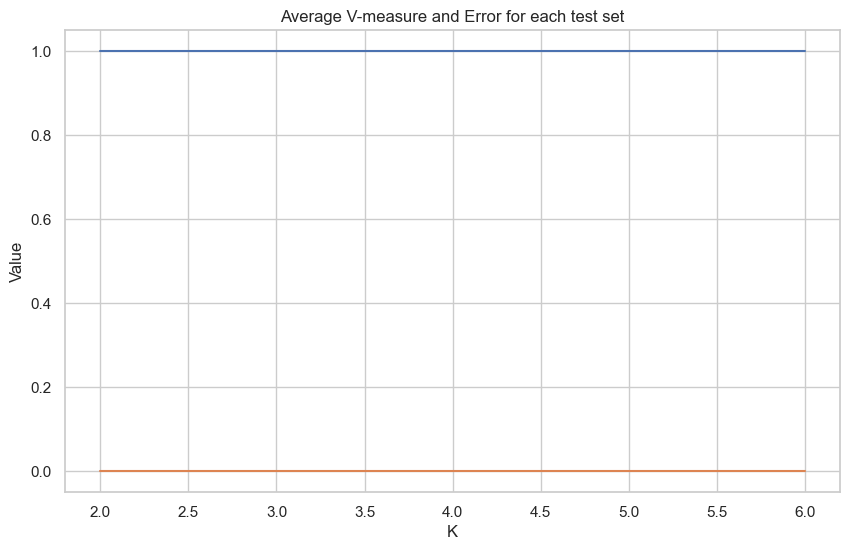

In [43]:

# Plotting average V-measure and Error for each test set
plt.figure(figsize=(10,6))
plt.plot([2, 3, 4, 5, 6], [average_v_K_2, average_v_K_3, average_v_K_4, average_v_K_5, average_v_K_6], label='Average V-measure')
plt.plot([2, 3, 4, 5, 6], [average_error_K_2, average_error_K_3, average_error_K_4, average_error_K_5, average_error_K_6], label='Average Error')
plt.xlabel('K')
plt.ylabel('Value')
plt.title('Average V-measure and Error for each test set')


### Unlabelled Data (Bonus Part)

In [102]:
# Reading data from the CSV file
unlabelled = pd.read_csv('MAC_derand_unlabelled-challenge.csv')

When the data is examined, there are 20464 probe requests. It has similar columns with the lecture and challenge data. 

In [103]:
display(unlabelled)

,Timestamp,MAC Address,Channel,DS Channel,HT Capabilities,Extended Capabilities,Vendor Specific Tags,SSID,Supported Rates,Extended Supported Rates,VHT Capabilities,HE Capabilities,Length
0,1.623419e+09,40:f3:08:d8:f3:08,11,9.0,2d1017ff00000000000000000000000000000000000000...,0000080000000040,001018020000100000,NaN,02040b16,0c1218243048606c,NaN,NaN,165
1,1.623404e+09,40:f3:08:d8:f3:08,11,3.0,2d1017ff00000000000000000000000000000000000000...,0000080000000040,001018020000100000,NaN,02040b16,0c1218243048606c,NaN,NaN,165
2,1.623421e+09,40:f3:08:d8:f3:08,11,12.0,2d1017ff00000000000000000000000000000000000000...,0000080000000040,001018020000100000,NaN,02040b16,0c1218243048606c,NaN,NaN,165
3,1.623405e+09,40:f3:08:d8:f3:08,1,3.0,2d1017ff00000000000000000000000000000000000000...,0000080000000040,001018020000100000,NaN,02040b16,0c1218243048606c,NaN,NaN,165
4,1.626771e+09,b2:a6:bb:76:7e:ff,1,3.0,ad0113ffff000000000000000000000000000000000000...,00000a82004000000001,0050f208002700,NaN,02040b16,0c1218243048606c,92f99133faff6203faff6203,020009,165
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20459,1.697027e+09,ec:c0:0f:94:26:87,1,3.0,ef0113ffff000000000000000000000000000000000000...,04000a8200400040800120,0050f208002800,1857de08b31a,02040b16,0c1218243048606c,92f19033faff6203faff6203,2303010002400006304c090d008008020000fafffaff19...,185
20460,1.697027e+09,ec:c0:0f:94:26:87,1,3.0,ef0113ffff000000000000000000000000000000000000...,04000a8200400040800120,0050f208002800,e26731af925,02040b16,0c1218243048606c,92f19033faff6203faff6203,2303010002400006304c090d008008020000fafffaff19...,184
20461,1.697027e+09,ec:c0:0f:94:26:87,1,3.0,ef0113ffff000000000000000000000000000000000000...,04000a8200400040800120,0050f208002800,03af9014bf2b48a844,02040b16,0c1218243048606c,92f19033faff6203faff6203,2303010002400006304c090d008008020000fafffaff19...,191
20462,1.697027e+09,ec:c0:0f:94:26:87,1,3.0,ef0113ffff000000000000000000000000000000000000...,04000a8200400040800120,0050f208002800,0864a4b6b,02040b16,0c1218243048606c,92f19033faff6203faff6203,2303010002400006304c090d008008020000fafffaff19...,182


There are too many missing values in SSID, VHT Capabilities and HE Capabilities, but the other columns looks fine

In [104]:
# Checking for missing values
print("Number of missing values in each column:")
display(unlabelled.isna().sum())
print("\nPercentage of missing values in each column:")
display(unlabelled.isna().sum()/len(unlabelled)*100)


Number of missing values in each column:


Timestamp                       0
MAC Address                     0
Channel                         0
DS Channel                      1
HT Capabilities                 0
Extended Capabilities           0
Vendor Specific Tags         3036
SSID                        19529
Supported Rates                 0
Extended Supported Rates        0
VHT Capabilities            17857
HE Capabilities             15619
Length                          0
dtype: int64


Percentage of missing values in each column:


Timestamp                    0.000000
MAC Address                  0.000000
Channel                      0.000000
DS Channel                   0.004887
HT Capabilities              0.000000
Extended Capabilities        0.000000
Vendor Specific Tags        14.835809
SSID                        95.431001
Supported Rates              0.000000
Extended Supported Rates     0.000000
VHT Capabilities            87.260555
HE Capabilities             76.324277
Length                       0.000000
dtype: float64

There are 1501 different MAC Addresses. The other features looks like usable, HE Capabilities has higher unique values, it is not suitable for clustering. Length has 10 unique values, which is at the edge of being useful and not useful for clustering. 

In [106]:
display(unlabelled.nunique())


Timestamp                   20461
MAC Address                  1501
Channel                         3
DS Channel                     13
HT Capabilities                 8
Extended Capabilities           8
Vendor Specific Tags            6
SSID                            5
Supported Rates                 3
Extended Supported Rates        2
VHT Capabilities                2
HE Capabilities                56
Length                         19
dtype: int64

Pre-processing the unlabelled data in the same way

In [107]:
unlabelled = preprocess(unlabelled)

/var/folders/wf/h4cmwskx1rxch7ts3ytb_7cr0000gn/T/ipykernel_23591/29677120.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  col_drop = [nan_percentage.index[i] for i in range(len(nan_percentage)) if nan_percentage[i] > 60]
/var/folders/wf/h4cmwskx1rxch7ts3ytb_7cr0000gn/T/ipykernel_23591/29677120.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  features = [unique_elem.index[i] for i in range(len(unique_elem)-1) if unique_elem[i] < 20]


In [108]:
# Clustering the unlabelled data
clustred_unlabelled = cluster_rows(unlabelled, 4, unlabelled.columns)

When de data is clustered for N=4, there are 12 clusters are created. Cluster 11 is a single case, which is probably a wrong cluster. The other clusters look good. Therefore, I can conclude that there are probably 11 devices that generated these probe requests

In [109]:
print(clustred_unlabelled['Cluster ID'].value_counts())

Cluster ID
5.0     9376
4.0     4198
0.0     1489
10.0    1184
9.0      983
1.0      904
2.0      724
3.0      667
7.0      407
8.0      328
6.0      203
11.0       1
Name: count, dtype: int64
